# Poboljšanje medicinskih slika zasnovano na algoritmima histograma

Poboljšanje medicinskih slika predstavlja ključni korak u dijagnostici i lečenju pacijenata, jer kvalitet slike direktno utiče na sposobnost lekara da pravilno tumači anatomske strukture i identifikuje potencijalne probleme. Zbog prirode medicinskih slika, koje često pate od problema kao što su niski kontrast i šum, važno je primeniti tehnike poboljšanja kako bi se obezbedila što jasnija i preciznija vizuelna informacija.

Jedan od najčešće korišćenih pristupa za poboljšanje kontrasta slike je izjednačavanje histograma (HE). Međutim, iako HE može značajno poboljšati kontrast, može takođe generisati neželjene artefakte i prekomerno pojačanje kontrasta u određenim delovima slike. Da bi se rešili ovi problemi, razvijeni su različiti napredni algoritmi zasnovani na histogramu, kao što su kumulativno izjednačavanje histograma (CHE), kvadratno dinamičko izjednačavanje histograma (QDHE), i kontrastno ograničeno adaptivno izjednačavanje histograma (CLAHE).

Ovaj projekat ima za cilj da analizira i uporedi performanse ovih algoritama na različitim medicinskim slikama. Kroz implementaciju i analizu rezultata koristeći Python, pokazujemo prednosti i nedostatke svakog od pristupa.

## Obrada Histograma Slike
Obrada histograma slike predstavlja osnovu za mnoge tehnike obrade slika u prostornom domenu. Histogram slike je grafički prikaz raspodele sivih tonova u digitalnoj slici. Prikazivanje histograma pomaže u analizi učestalosti pojavljivanja različitih sivih tonova koji su prisutni u slici.

Histogram se koristi za različite svrhe, kao što su poboljšanje kontrasta, kompresija slike i segmentacija. Algoritmi zasnovani na histogramu jednostavni su za implementaciju i mogu se efikasno primeniti na različite tipove slika. Jedan od najpoznatijih algoritama u ovoj oblasti je izjednačavanje histograma (HE), koji raspoređuje nivoe intenziteta u slici tako da budu podjednako verovatni, što rezultira slikom sa povećanim dinamičkim opsegom i poboljšanim kontrastom.

Kod medicinskih slika, histogram može pružiti korisne informacije o osvetljenju slike i njenom kontrastu. Na primer, histogram koji pokriva sve moguće vrednosti u skali sivih tonova ukazuje na to da slika ima dobar kontrast i da su detalji na slici jasno vidljivi.

In [ ]:
! pip install matplotlib numpy opencv-python

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_images_and_histograms(images, max_value=6000):
    n = len(images)
    fig, ax = plt.subplots(2, n, figsize=(7*n, 10))

    for i, image in enumerate(images):
        ax[0, i].imshow(image, cmap='gray', vmin=0, vmax=256)
        ax[0, i].axis('off')
        
        ax[1, i].hist(image.ravel(), bins=256, range=[0, 256], color='black')
        ax[1, i].set_xlim([0, 256])
        ax[1, i].set_ylim([0, max_value])
        ax[1, i].set_yticklabels([])

    plt.tight_layout()
    plt.show()

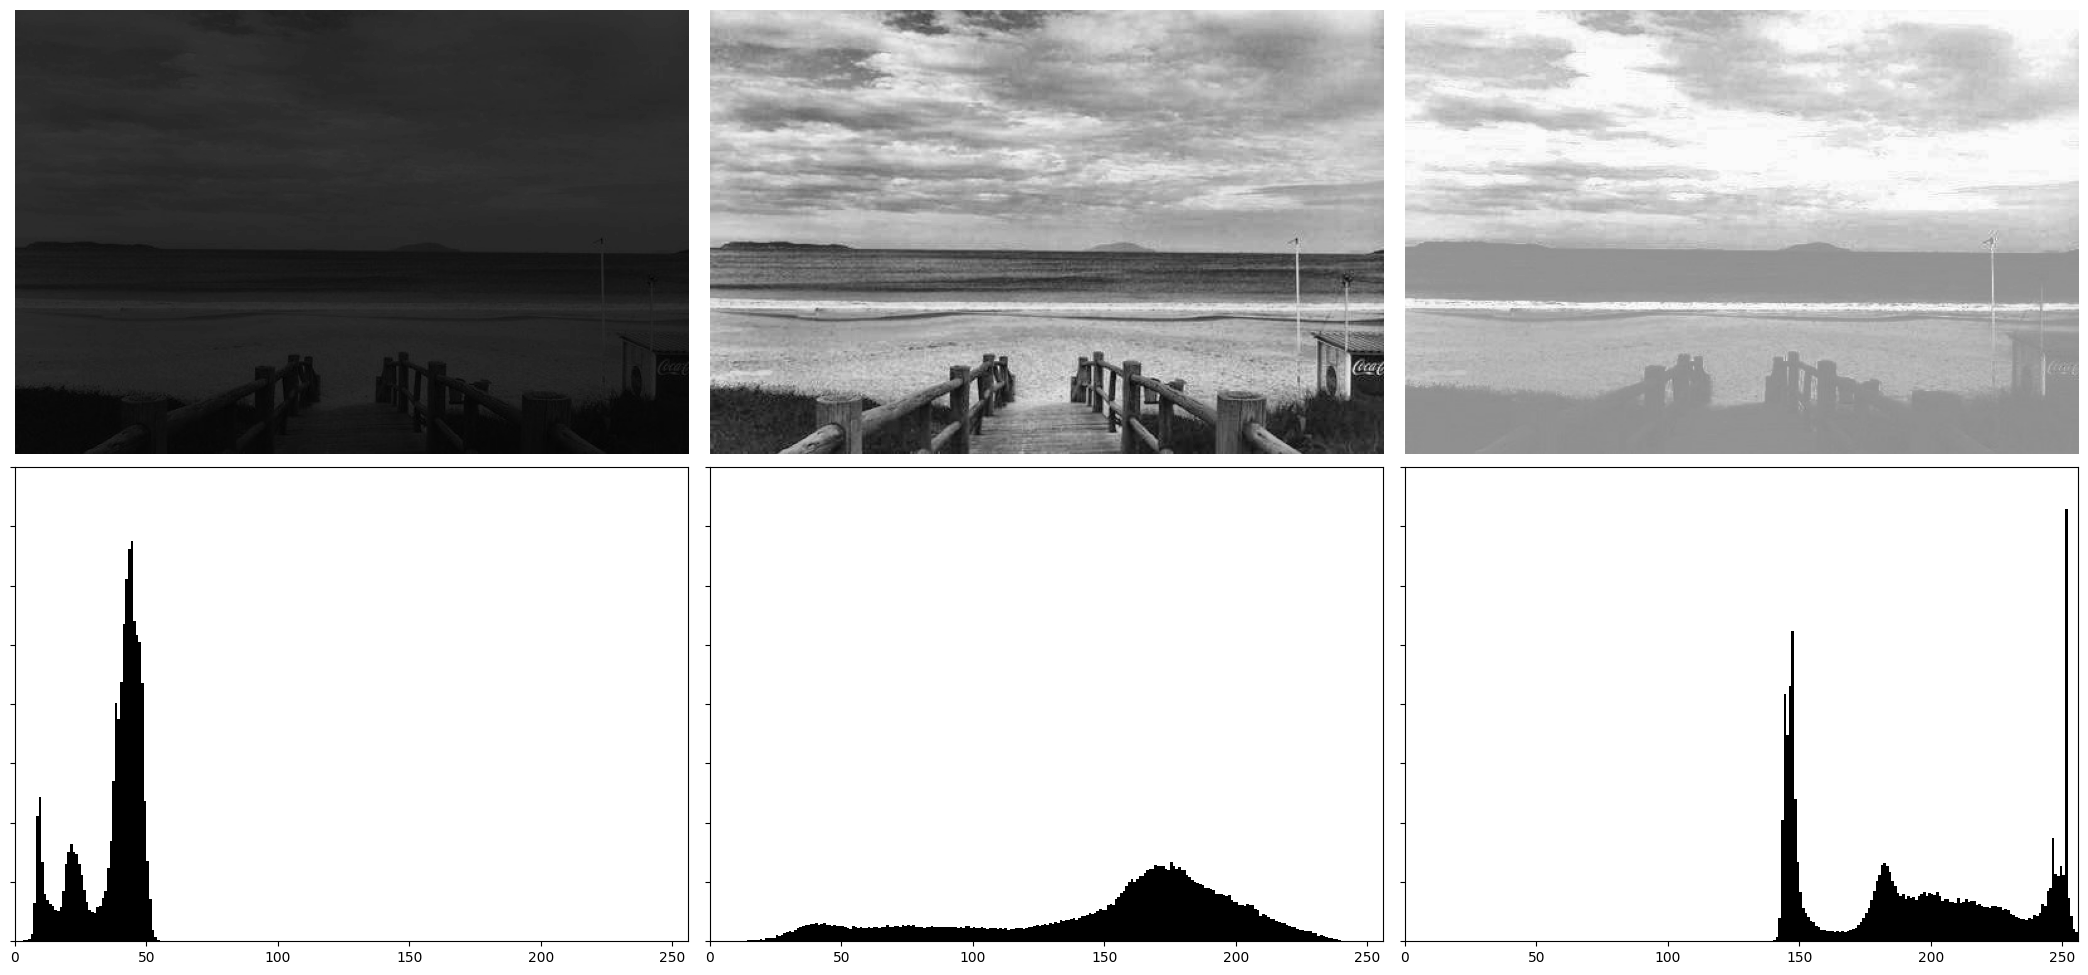

In [85]:
image_paths = [
    ('images\\dark_image.jpg'),
    ('images\\original_image.jpg'),
    ('images\\bright_image.jpg'),
]
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]
show_images_and_histograms(images,max_value=16000)

### Generisanje Histograma
Histogram digitalne slike $X$ može se predstaviti sledećom formulom:
$$ 
h_X(k) = n_k 
$$ 
gde je $n_k$ broj piksela sa intenzitetom $k$.

Posmatrajući intenzitet piksela slike kao slučajnu veličinu, definišemo *normalizovani histogram* kao empirijsku verovatnoću da piksel date slike ima određenu vrednost, što se može dobiti podelom $h(k)$ sa ukupnim brojem piksela u slici dimenzije $M \times N$:
$$ p_X(k) = \frac{n_k}{MN} $$ 

### Izjednačavanje histograma 
Izjednačavanje histograma (*Histogram equalization*) transformiše vrednosti intenziteta slike tako da budu ravnomerno raspoređene po celom mogućem rasponu $[0,255]$. 

**Kumulativna distribuciona funkcija** (*CDF*) je verovatnoća da slučajna promenljiva $X$ ima vrednost *manju ili jednaku* datoj vrednosti:
$$
cdf_X(k) = \sum_{i=0}^{k}p_X(x=i).
$$

Želimo da transformišemo sliku $X$ tako da slika $Y = T(X)$ ima uniforman histogram, odnosno kumulativnu distribucionu funkciju:
$$
cdf_Y(k) = (k+1)C,
$$ 
za neku konstantu $C$.

Novu sliku dobijamo tako što piksele koji imaju intenzitet $k$ transformišemo sa:
$$
t(k) = \left \lfloor cdf_X(k)\cdot 255 \right \rfloor  .
$$

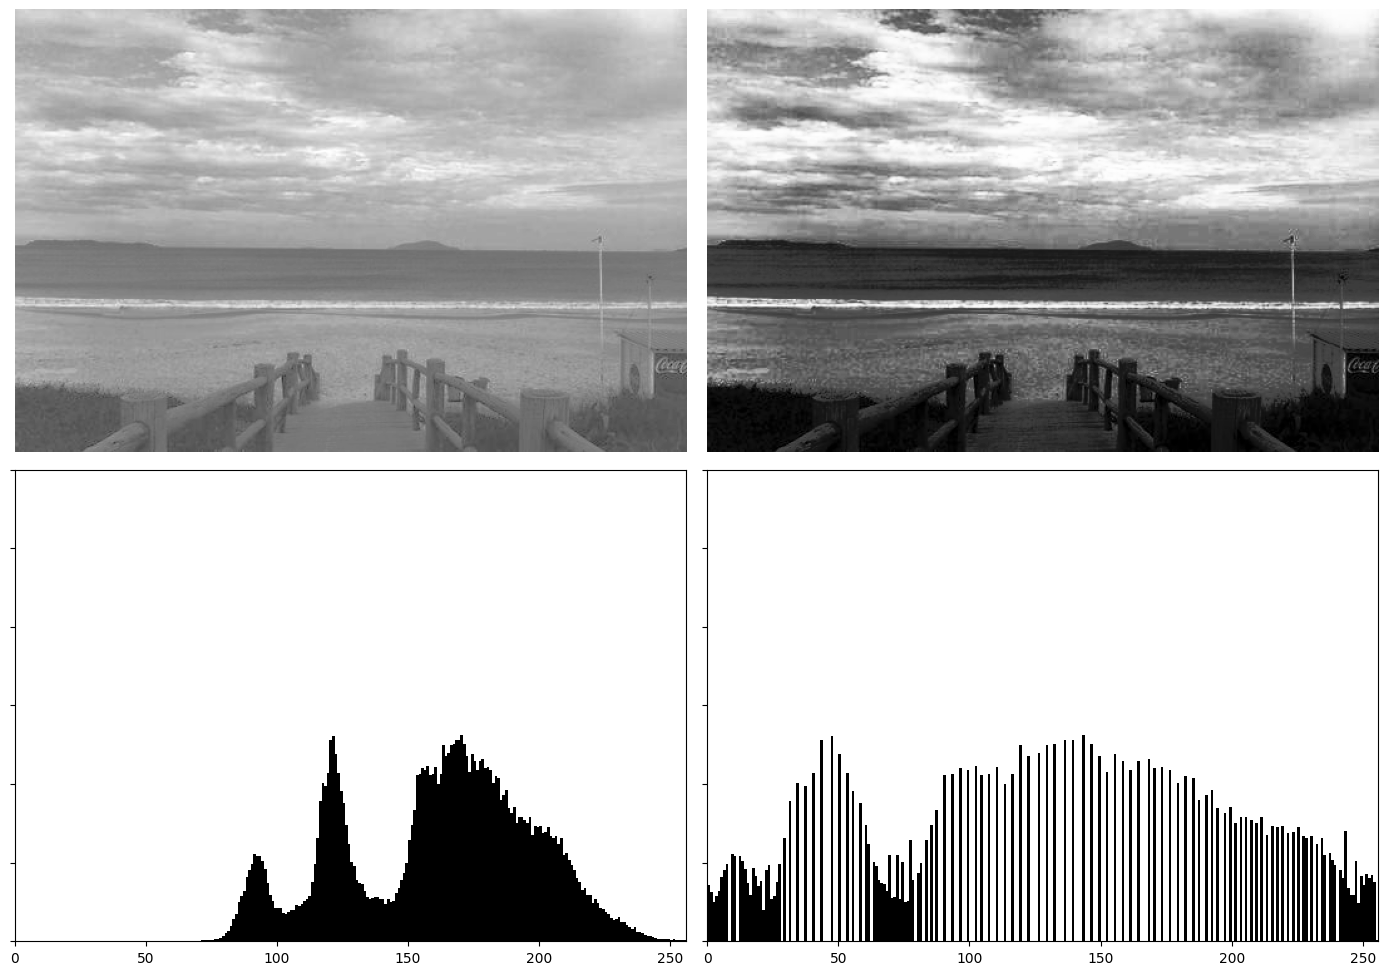

In [86]:
def cumulative_histogram_equalization(image, L=256, scale=255):
    hist, _ = np.histogram(image.flatten(), L, [0, L])
    total_pixels = image.flatten().size
    norm_hist = hist / total_pixels
    cdf = np.cumsum(norm_hist)
    cdf_normalized = np.floor(cdf * scale).astype(int)
    return cdf_normalized[image]

image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
che_image = cumulative_histogram_equalization(image)

images = [image, che_image]
show_images_and_histograms(images)